<a href="https://colab.research.google.com/github/2303A51876/ADM-1876/blob/main/ADM%20ASS-8(1876)(WINE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
# Load the Wine dataset
df_wine = pd.read_csv("/content/wine.csv")
# Display the first few rows
print(df_wine.head())

   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  


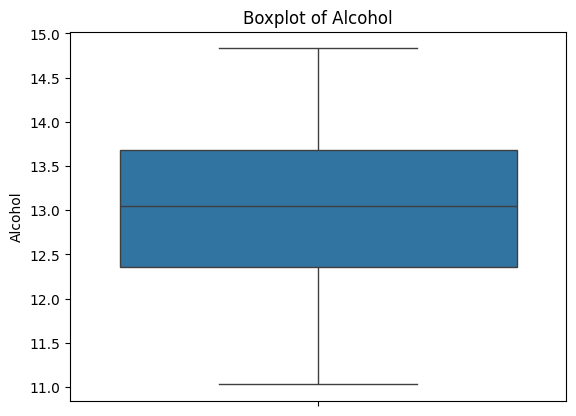

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Box plot for 'Alcohol' column (example numerical column)
sns.boxplot(df_wine['Alcohol'])
plt.title("Boxplot of Alcohol")
plt.show()

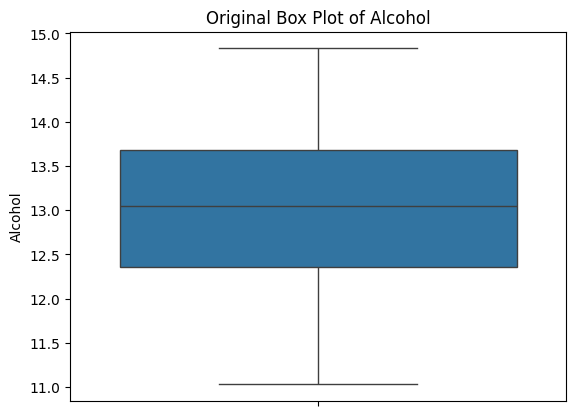

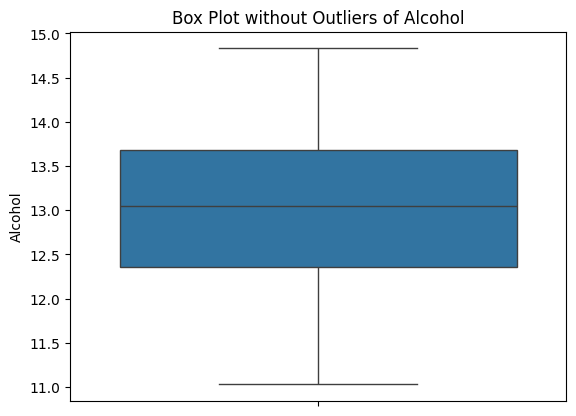

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
    removed_outliers = df[df[column] <= threshold]
    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
threshold_value = 15  # Example threshold for 'Alcohol'
df_no_outliers = removal_box_plot(df_wine, 'Alcohol', threshold_value)

In [5]:
import numpy as np
import pandas as pd
# Drop NaN values in 'Alcohol'
df_wine = df_wine.dropna(subset=['Alcohol'])
# Calculate IQR
Q1, Q3 = df_wine['Alcohol'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
# Identify outliers
outliers = df_wine[(df_wine['Alcohol'] < lower) | (df_wine['Alcohol'] > upper)]
print("Outliers:\n", outliers)

Outliers:
 Empty DataFrame
Columns: [Wine, Alcohol, Malic.acid, Ash, Acl, Mg, Phenols, Flavanoids, Nonflavanoid.phenols, Proanth, Color.int, Hue, OD, Proline]
Index: []


In [6]:
# Capping outliers in 'Alcohol'
df_wine['Alcohol'] = np.clip(df_wine['Alcohol'], lower, upper)

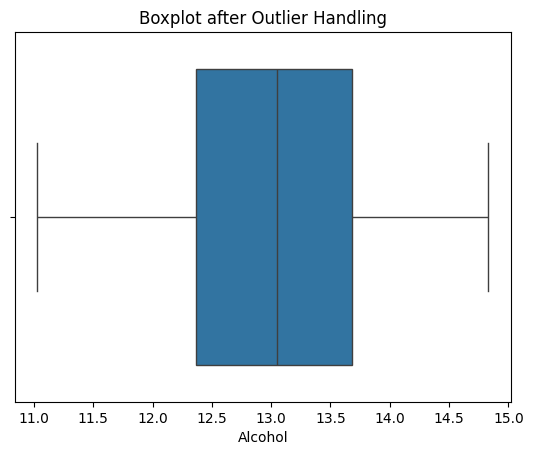

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df_wine['Alcohol'])
plt.title("Boxplot after Outlier Handling")
plt.show()